# Playground

In [10]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('../..', 'simulator/src')))
sys.path.append(os.path.abspath(os.path.join('../..', 'sample_sim/src')))
import matplotlib.pyplot as plt

from simulator.reporting import ReportSFC, ReportResources
from sample_sim.sim_example import SampleSim
from sample_sim.balanced_routing import BalancedRouting

In [2]:
# initiate the simulator
sim = SampleSim("./sim_config.json")
# Set the algorithm for resource allocation
sim.set_algorithm(BalancedRouting)
# build the simulation environment according to 
sim.build_environment("../../external_resources/sim_topologies/sample_topo.json")
# Run the simulation
sim.run_simulation()

# Get the simulation reports
sfc_report = sim.collector.get_sfc_report()
res_report = sim.collector.get_resource_report()
rt_report = sim.collector.get_runtime_report()
task_report = sim.collector.get_event_report()

In [7]:
report_sfc = ReportSFC()
report_res = ReportResources()
# get some standard metrics
sfc_metrics = report_sfc.get_metrics(sfc_report)
res_metrics = report_res.get_metrics(res_report)

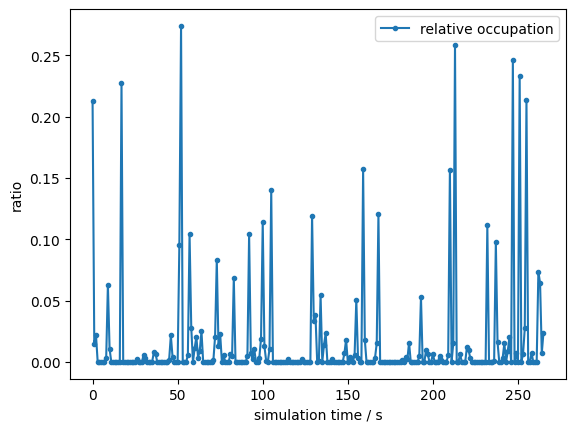

In [14]:
# sample plot of relative occupation from the resource report
fig, ax = plt.subplots(1,1)
report_res.plot_metric_over_time(ax, res_report)